# 결정트리

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

* 엔트로피(Entropy)
    * $ entropy = \Sigma -p_{i}\log_{2}p_{i} $
    * leaf node의 불순도를 측정하는 지표
    * 소수 클래스의 변화에 더 큰 가중치를 부여한다. $-p\log_{2}p$ 그래프에서 0.3 좌단의 기울기 변화가 훨씬 크다.
* 정보이득
    * 부모노드에서 자식노드로 분기했을 때 엔트로피 증감의 평균(기대값)
    * $정보이득 = 부모노드 엔트로피 - \Sigma(특정자식노드의 관측값 수/전체 자식노드의 관측값 수 * 특정 자식노드의 엔트로피) $
* 지니불순도
    * $ \Sigma(1-p_{i}^2) $
    * 엔트로피와 같은 의미. 간단하게 계산할 수 있다.


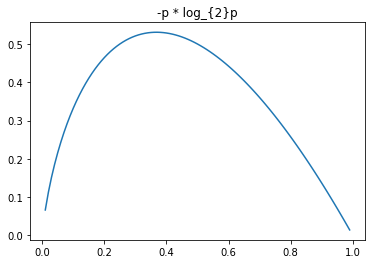

In [22]:
# entropy graph
p = np.arange(0.01, 1, 0.01)
y = -p*np.log2(p)
plt.title('-p * log_{2}p')
plt.plot(p, y)
plt.show()

## HR 퇴직률 데이터
* 직원이 떠날것인지 남을것인지 예측

In [23]:
root = 'C:/Users/wonca/Documents/git_repositories/TIL/2_머신러닝이론/4_tree_based_models/data/'
file_name = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
hr_df = pd.read_csv(root + file_name)
print(hr_df.shape)
hr_df.head(2)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [24]:
# ylabel
y = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
hr_df['y'] = y

In [25]:
# 더미변수 생성
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
dummy_cols = []
for cat_col in categorical_cols:
    dummy_col = pd.get_dummies(hr_df[cat_col], prefix=cat_col)
    dummy_cols.append(dummy_col)
dummy_cols[0].head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0


In [26]:
# 연속형 변수
origianl_numeric_cols = hr_df.select_dtypes(include=np.int64).columns.tolist()
remove_cols = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
numeric_cols = [el for el in origianl_numeric_cols if el not in remove_cols]
numeric_df = hr_df[numeric_cols]

In [33]:
# 더미변수 + 연속형변수
hr_new_df = pd.concat(dummy_cols + [numeric_df], axis=1)
hr_new_df.head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,0,0,1,0,0,1,0,1,0,0,...,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,...,4,1,10,3,3,10,7,1,7,0


In [36]:
# train test split
x = hr_new_df.drop(['y'], axis=1)
y = hr_new_df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.7, random_state=42)

In [37]:
# dt
# 분기기준: 지니불순도
# 최대깊이: 5
# 분할을 위한 최소관측값: 2개
# leaf node 최소관측값: 1개

dt_model = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5, 
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [40]:
# insample 
y_insamp_pred = dt_model.predict(x_train)

# 혼동행렬
display(pd.crosstab(y_train, y_insamp_pred, rownames=['actual'], colnames=['predict']))

print(classification_report(y_train, y_insamp_pred))

predict,0,1
actual,,
0,361,4
1,26,50


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       365
           1       0.93      0.66      0.77        76

    accuracy                           0.93       441
   macro avg       0.93      0.82      0.86       441
weighted avg       0.93      0.93      0.93       441



['precision',
 'recall',
 'f1-score',
 'support',
 '0',
 '0.93',
 '0.99',
 '0.96',
 '365',
 '1',
 '0.93',
 '0.66',
 '0.77',
 '76',
 'accuracy',
 '0.93',
 '441',
 'macro',
 'avg',
 '0.93',
 '0.82',
 '0.86',
 '441',
 'weighted',
 'avg',
 '0.93',
 '0.93',
 '0.93',
 '441']

In [41]:
# outsample 
y_outsamp_pred = dt_model.predict(x_test)

# 혼동행렬
display(pd.crosstab(y_test, y_outsamp_pred, rownames=['actual'], colnames=['predict']))

print(classification_report(y_test, y_outsamp_pred))

predict,0,1
actual,,
0,773,95
1,128,33


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       868
           1       0.26      0.20      0.23       161

    accuracy                           0.78      1029
   macro avg       0.56      0.55      0.55      1029
weighted avg       0.76      0.78      0.77      1029



In [45]:
# 0과 1의 비율확인
hr_new_df['y'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: y, dtype: float64

## 가중튜닝
* 1의 비율이 15%로 모두 0으로 분류하는 예측기를 만들어도 정확도가 83%가 나와야한다.
* 1의 비율이 상대적으로 작으므로 `class_weight`를 설정한다.
* 관측값
    * 0과 1의 가중치
    * 정확도
    * 정밀도
    * 재현율

In [55]:
dummies = np.empty((6, 10))
dt_wttune = pd.DataFrame(dummies)
dt_wttune.columns = ['zero_weight', 'one_weight', 
                     'insample_acc', 'outsample_acc', 
                     'pre_zero', 'pre_one', 'pre_all', 
                     'recl_zero', 'recl_one', 'recl_all']
dt_wttune

,zero_weight,one_weight,insample_acc,outsample_acc,pre_zero,pre_one,pre_all,recl_zero,recl_one,recl_all
0,1.321434e-311,1.321276e-311,0.000000e+00,0.000000e+00,1.160954e-28,1.160955e-28,5.099061e-138,-8.388683e+205,-6.829140e+212,-1.110656e-266
1,4.123378e+223,-5.147995e-306,1.991790e-153,-6.020458e-286,-6.950969e+212,-6.014231e-49,-4.499432e+214,3.009798e-67,6.791215e+212,2.649890e+180
2,-1.788809e+205,-1.198049e-218,4.137006e+223,6.218329e+175,6.420602e+170,4.753740e+180,2.162877e+185,5.830154e+252,8.089521e+188,1.811485e-152
3,6.013470e-154,6.013470e-154,6.013470e-154,6.013470e-154,2.656928e+233,4.066678e+223,6.013470e-154,6.013470e-154,6.013470e-154,6.013470e-154
4,2.723639e+161,4.812273e+233,4.073469e+223,6.013470e-154,6.013470e-154,6.013470e-154,6.013470e-154,2.723639e+161,3.679175e+180,1.811485e-152
5,6.013470e-154,6.013470e-154,6.013470e-154,6.013470e-154,4.817633e+151,7.507370e-67,5.566640e+228,8.288599e-114,1.139020e-94,7.339553e+223


In [64]:
zero_wt = [.01, .1, .2, .3, .4, .5]
for i in range(len(zero_wt)):
    class_weight = {0: zero_wt[i], 1: 1-zero_wt[i]}
    dt_model = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5, 
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=42,
                                  class_weight=class_weight)
    dt_model.fit(x_train, y_train)
    y_insamp_pred = dt_model.predict(x_train)
    y_outsamp_pred = dt_model.predict(x_test)
    insamp_acc = round(accuracy_score(y_train, y_insamp_pred), 3)
    outsamp_acc = round(accuracy_score(y_test, y_outsamp_pred), 3)
    
    dt_wttune.loc[i, 'zero_weight'] = zero_wt[i]
    dt_wttune.loc[i, 'one_weight'] = 1 - zero_wt[i]
    dt_wttune.loc[i, 'insample_acc'] = insamp_acc
    dt_wttune.loc[i, 'outsample_acc'] = outsamp_acc
    
    clf_report = classification_report(y_train, y_insamp_pred, output_dict=True)
    
    dt_wttune.loc[i, 'prec_zero'] = clf_report['0']['precision']
    dt_wttune.loc[i, 'prec_one'] = clf_report['1']['precision']
    dt_wttune.loc[i, 'prec_all'] = clf_report['macro avg']['precision']
    dt_wttune.loc[i, 'recl_zero'] = clf_report['0']['recall']
    dt_wttune.loc[i, 'recl_one'] = clf_report['1']['recall']
    dt_wttune.loc[i, 'recl_all'] = clf_report['macro avg']['recall']
    
    print(f'''
    class weight: {class_weight}
    insamp_acc: {insamp_acc}
    outsamp_acc: {outsamp_acc}
    outsamp confusion_matrix:
    ''')
    display(pd.crosstab(y_test, y_outsamp_pred, colnames=['Actual'], rownames=['Precited']))
    print("="*100)
   
    


    class weight: {0: 0.01, 1: 0.99}
    insamp_acc: 0.363
    outsamp_acc: 0.344
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,214,654
1,21,140



    class weight: {0: 0.1, 1: 0.9}
    insamp_acc: 0.839
    outsamp_acc: 0.674
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,618,250
1,85,76



    class weight: {0: 0.2, 1: 0.8}
    insamp_acc: 0.891
    outsamp_acc: 0.752
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,714,154
1,101,60



    class weight: {0: 0.3, 1: 0.7}
    insamp_acc: 0.923
    outsamp_acc: 0.771
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,750,118
1,118,43



    class weight: {0: 0.4, 1: 0.6}
    insamp_acc: 0.934
    outsamp_acc: 0.796
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,791,77
1,133,28



    class weight: {0: 0.5, 1: 0.5}
    insamp_acc: 0.932
    outsamp_acc: 0.783
    outsamp confusion_matrix:
    


Actual,0,1
Precited,,
0,773,95
1,128,33


In [68]:
dt_wttune

,zero_weight,one_weight,insample_acc,outsample_acc,pre_zero,pre_one,pre_all,recl_zero,recl_one,recl_all,prec_zero,prec_one,prec_all
0,0.01,0.99,0.363,0.344,1.160954e-28,1.160955e-28,5.099061e-138,0.230137,1.000000,0.615068,1.000000,0.212885,0.606443
1,0.10,0.90,0.839,0.674,-6.950969e+212,-6.014231e-49,-4.499432e+214,0.810959,0.973684,0.892322,0.993289,0.517483,0.755386
2,0.20,0.80,0.891,0.752,6.420602e+170,4.753740e+180,2.162877e+185,0.895890,0.868421,0.882156,0.970326,0.634615,0.802471
3,0.30,0.70,0.923,0.771,2.656928e+233,4.066678e+223,6.013470e-154,0.947945,0.802632,0.875288,0.958449,0.762500,0.860474
4,0.40,0.60,0.934,0.796,6.013470e-154,6.013470e-154,6.013470e-154,0.994521,0.644737,0.819629,0.930769,0.960784,0.945777
5,0.50,0.50,0.932,0.783,4.817633e+151,7.507370e-67,5.566640e+228,0.989041,0.657895,0.823468,0.932817,0.925926,0.929371
